In [1]:
from discode import models, utils

In [2]:
model = models.load("WEIGHT PATH")

In [3]:
model

TransformerClassifier(
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-7): 8 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=480, out_features=480, bias=True)
        )
        (linear1): Linear(in_features=480, out_features=480, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=480, out_features=480, bias=True)
        (norm1): LayerNorm((480,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((480,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc1): Linear(in_features=480, out_features=96, bias=True)
  (fc2): Linear(in_features=96, out_features=2, bias=True)
)

In [4]:
name, sequence = "3M6I", "MASSASKTNIGVFTNPQHDLWISEASPSLESVQKGEELKEGEVTVAVRSTGICGSDVHFWKHGCIGPMIVECDHVLGHESAGEVIAVHPSVKSIKVGDRVAIEPQVICNACEPCLTGRYNGCERVDFLSTPPVPGLLRRYVNHPAVWCHKIGNMSYENGAMLEPLSVALAGLQRAGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGRLKFAKEICPEVVTHKVERLSAEESAKKIVESFGGIEPAVALECTGVESSIAAAIWAVKFGGKVFVIGVGKNEIQIPFMRASVREVDLQFQYRYCNTWPRAIRLVENGLVDLTRLVTHRFPLEDALKAFETASDPKTGAIKVQIQSLE"

In [7]:
data = utils.tokenize_and_dataloader(name, sequence)
outlier_idx, probability, predicted_label, _name, attention_weights  = utils.model_processing(data, model)

The maximum attention sum is ... 1600.819
The salient residues are ... ['I52', 'C186', 'D211', 'I212', 'V284', 'A347']
The attention sum of I52 is ... 470.847
The attention sum of C186 is ... 414.034
The attention sum of D211 is ... 551.388
The attention sum of I212 is ... 1600.819
The attention sum of V284 is ... 479.219
The attention sum of A347 is ... 375.987


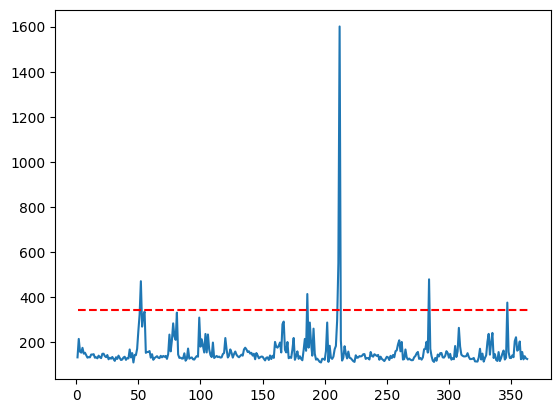

In [8]:
utils.make_attention_sum(attention_weights, outlier_idx, sequence)

In [9]:
utils.scan_switch_mutation(model = model,
                           max_num_mutation = 1,
                           max_num_solution = 20,
                           prob_thres = 0.5,
                           name = name,
                           sequence = sequence,
                           pickle_path = "PICKLE PATH",
                           mode = "shortest")

The mutation was derived in 1 mutations. Iteration stopped.


,NAD,NADP
3M6I_D211R,0.019058,0.980842


In [10]:
utils.scan_switch_mutation(model = model,
                           max_num_mutation = 1,
                           max_num_solution = 20,
                           prob_thres = 0.5,
                           name = name,
                           sequence = sequence,
                           pickle_path = "PICKLE PATH",
                           mode = "iterative_num")

The mutation step (('3M6I',), 1) end...
The mutation scanning is end but not sufficient solution...


,NAD,NADP
3M6I_D211R,0.019058,0.980842


In [11]:
utils.scan_switch_mutation(model = model,
                           max_num_mutation = 1,
                           max_num_solution = 20,
                           prob_thres = 0.5,
                           name = name,
                           sequence = sequence,
                           pickle_path = "PICKLE PATH",
                           mode = "iterative_prob")

The mutation step (('3M6I',), 1) end...
The mutation scanning is end but not sufficient solution...


,NAD,NADP
3M6I_D211R,0.019058,0.980842
